from: https://alexwlchan.net/2022/10/circle-experiments/

https://www.blog.pythonlibrary.org/2021/02/23/drawing-shapes-on-images-with-python-and-pillow/

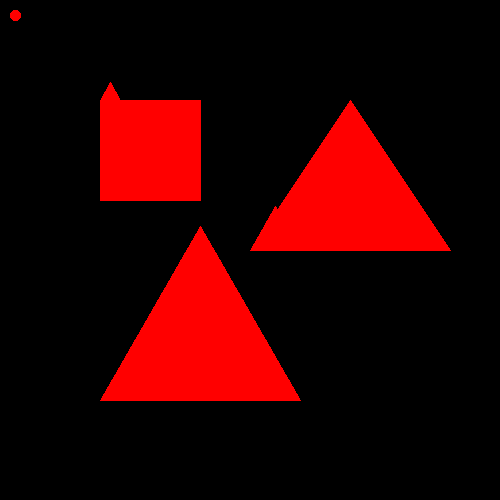

In [65]:
import random
import math

from PIL import Image, ImageDraw

im = Image.new('RGB', size=(500, 500))
draw = ImageDraw.Draw(im)

draw.ellipse([(10, 10), (20, 20)], fill=(255, 0, 0))

draw.rectangle([(100, 100), (200, 200)], fill=(255, 0, 0))

draw.polygon([(250, 250), (350, 100), (450, 250) ], fill=(255, 0, 0))



startpoint_x = 100
startpoint_y = 400
edgeLength = 200


def draw_equilateral_triangle(draw, img, x1, y1, length, myFill):

    # find the mid point using standard math
    mid_x = x1+(length/2)
    mid_y = y1-(length*math.sqrt(3)/2)

    draw.polygon([(x1, y1), (mid_x, mid_y), (x1+length, y1) ], fill=myFill)


draw_equilateral_triangle(draw, im, startpoint_x, startpoint_y, edgeLength, (255, 0, 0))

draw_equilateral_triangle(draw, im, 100, 100, 20, (255, 0, 0))
draw_equilateral_triangle(draw, im, 250, 250, 50, (255, 0, 0))


im
#im.save('red_circle.png')

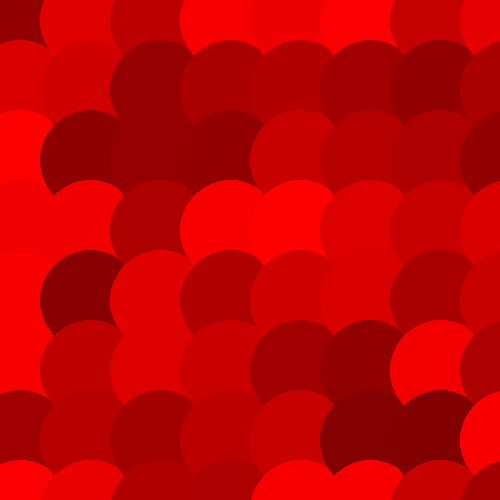

In [3]:

for x in range(-100, 600, 70):
    for y in range(-100, 600, 70):
        draw.ellipse(
            [(x, y), (x + 100, y + 100)],
            fill=(random.randint(128, 255), 0, 0)
        )

im
#im.save('grid_of_circles.png')

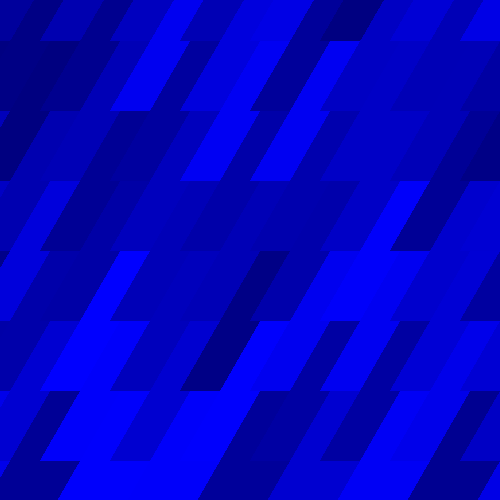

In [37]:

# test playing with triangles

im = Image.new('RGB', size=(500, 500), color=(255,255,255))
draw = ImageDraw.Draw(im)

# start before canvas at -100, stop beyond canvas at 600, steps of 70
for x in range(-100, 600, 70):
    for y in range(-100, 600, 70):
        draw_equilateral_triangle(draw, im, x, y, 200, (0, 0, random.randint(128, 255)))

im

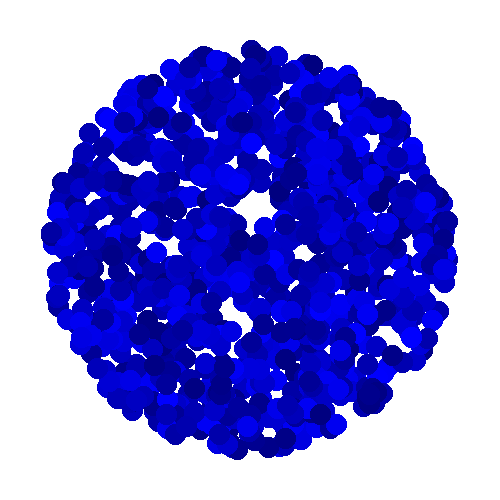

In [60]:
# plot circles within a circle

# inspired by https://jyopari.github.io/randomCirc.html

im = Image.new('RGB', size=(500, 500), color=(255,255,255))
draw = ImageDraw.Draw(im)

# number of and radius of small "fill" circles
number_of_circles = 1000
circle_radius = 10

#radius of large circle
R = 200
# x,y centre point of large circle
midX = 250
midY = 250

for i in range(number_of_circles):
        theta = random.uniform(0,2*math.pi)
        r = random.uniform(0,R)
        x = midX+(math.sqrt(r*R)*math.cos(theta))
        y = midY+(math.sqrt(r*R)*math.sin(theta))
        draw.ellipse(
            [(x - circle_radius, y - circle_radius), (x + circle_radius, y + circle_radius)],
            fill=(0,0, random.randint(128, 255))
        )

im

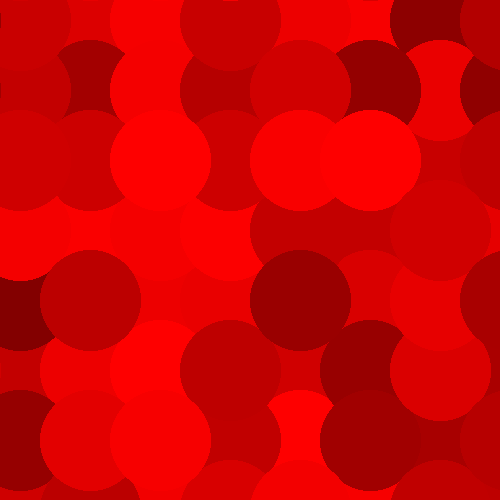

In [6]:
coords = [
    (x, y)
    for x in range(-100, 600, 70)
    for y in range(-100, 600, 70)
]

random.shuffle(coords)

im = Image.new('RGB', size=(500, 500))
draw = ImageDraw.Draw(im)

for (x, y) in coords:
    draw.ellipse(
        [(x, y), (x + 100, y + 100)],
        fill=(random.randint(128, 255), 0, 0)
    )

im
#im.save('grid_of_random_circles.png')

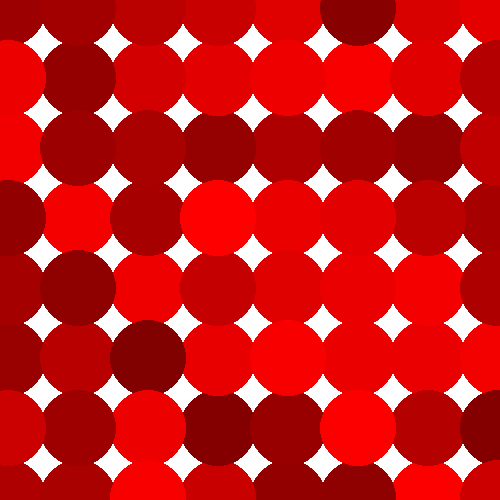

In [8]:

coords = [
    (x, y)
    for x in range(-100, 600, 70)
    for y in range(-100, 600, 70)
]

random.shuffle(coords)

im = Image.new('RGB', size=(500, 500), color=(255,255,255))
draw = ImageDraw.Draw(im)

for (x, y) in coords:
    draw.ellipse(
        [(x, y), (x + 75, y + 75)],
        fill=(random.randint(128, 255), 0, 0)
    )

im

https://betterprogramming.pub/creating-algorithmic-art-with-python-edb5c5ea0a87

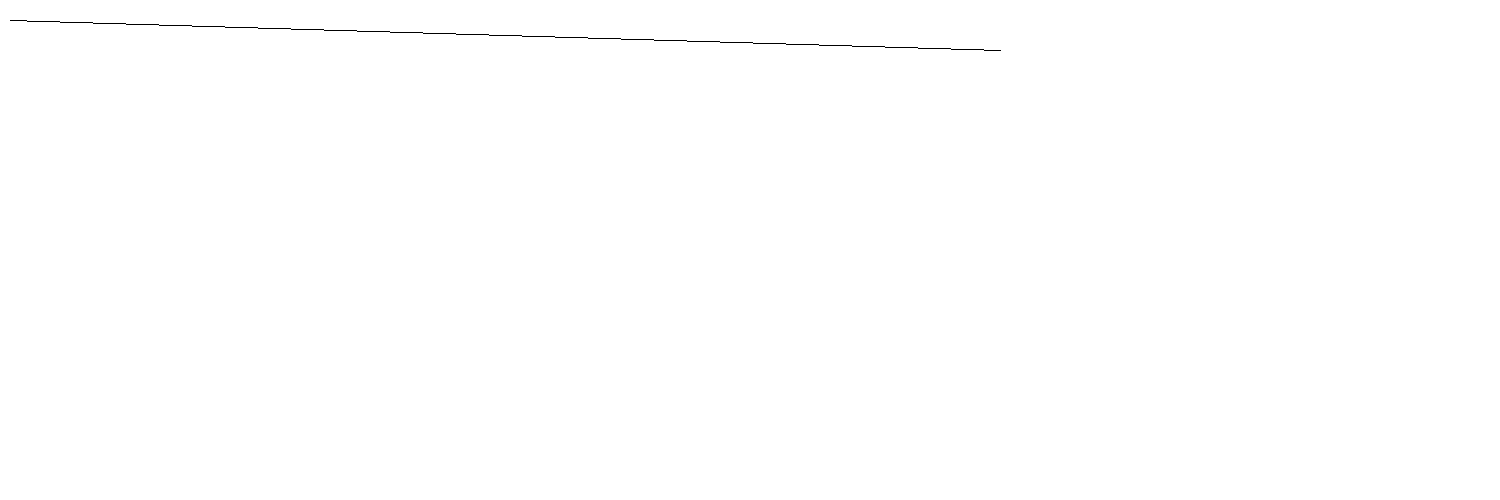

In [61]:
# Define the canvas size
width = 1500
height = 500
im = Image.new("RGB", (width, height), (255, 255, 255))
draw = ImageDraw.Draw(im)

# Draw a single line
x1, y1 = 10, 20
x2, y2 = 1000, 50
color = (0, 0, 0)  # rgb
draw.line((x1, y1, x2, y2), fill=color)

# Save the image as a PNG
im
#im.save("rectangles.png", "PNG")

https://scipython.com/blog/computer-generated-contemporary-art/

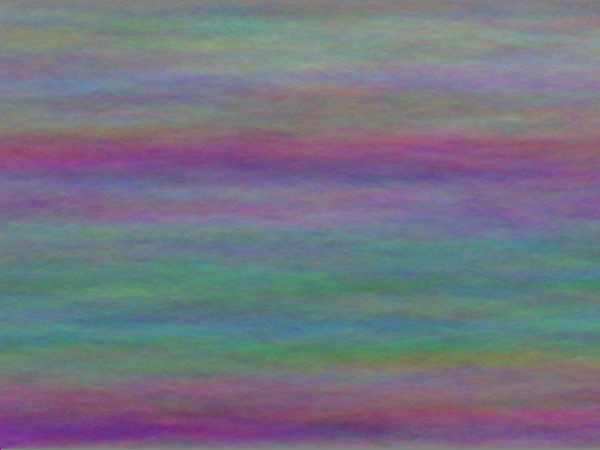

In [63]:
import sys
import numpy as np
from PIL import Image


rshift = 5
width, height = 600, 450
arr = np.ones((height, width, 3)) * 128

for y in range(1,height):
    arr[y,0] = arr[y-1,0] + np.random.randint(-rshift, rshift+1, size=3)

for x in range(1, width):
    for y in range(1,height-1):
        arr[y,x] = ((arr[y-1, x-1] + arr[y,x-1] + arr[y+1,x-1])/3 +
                            np.random.randint(-rshift, rshift+1, size=3))

im = Image.fromarray(arr.astype(np.uint8)).convert('RGBA')
im
#im.save(filename)